In [2]:
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from functools import partial

In [3]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            print(f"{i+1}: Path: {paths[i]}, last generation: {int(last_gen)}")
            last_gens.append(int(last_gen))
        except:
            continue
    return paths, last_gens

In [4]:
dir_path = "results/"
paths, last_gens = read_all_results(dir_path)

2: Path: GA_2021_06_05_13_19_14, last generation: 42
3: Path: GA_2021_06_05_13_18_22, last generation: 40
4: Path: GA_2021_06_05_13_18_46, last generation: 41
5: Path: GA_2021_06_05_13_18_39, last generation: 42
6: Path: GA_2021_06_05_17_50_02, last generation: 32
7: Path: GA_2021_06_05_13_19_08, last generation: 41
8: Path: GA_2021_06_05_16_10_38, last generation: 34
9: Path: GA_2021_06_05_13_18_32, last generation: 40


In [147]:
run = 8
path = dir_path + paths[run-1]
with open(path + "/run_params.json", "r") as file:
    print(file.read())
    file.close()

{
    "objective": "deaths",
    "simulations": 30,
    "process": {
        "horizon": 37,
        "decision_period": 56,
        "policy": "weighted"
    },
    "population_size": 39,
    "random_individuals": true,
    "min_generations": 200
}


## Individual results

In [148]:
gen = 34
individuals_path =  f"{path}/individuals/individuals_{gen}.pkl"
individuals = utils.read_pickle(individuals_path)

In [149]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
print("Strategy_count:")
print(f"{utils.tcolors.BOLD}{'#':<3} {'U':<5}{'D':<5}{'N':<5}{utils.tcolors.ENDC}")
for trend_count in range(6):
    strategy_count = individuals[0].strategy_count
    print(f"{trend_count+1:<2}| {strategy_count['U'][trend_count]:<5}{strategy_count['D'][trend_count]:<5}{strategy_count['N'][trend_count]:<5}")
print()
for ix, i in enumerate(sorted(individuals, key=lambda x: x.mean_score)):
    print(f"{utils.tcolors.BOLD}{ordinal(ix+1)} place:{utils.tcolors.ENDC}")
    print(f"ID: {i.ID}")
    print(f"Score: {np.round(i.mean_score, 3)}")
    print(f"Genes:\n{np.round(i.genes, 3)}")
    print()

Strategy_count:
#   U    D    N    
1 | 30   30   30   
2 | 26   20   30   
3 | 17   9    30   
4 | 6    0    23   
5 | 1    0    12   
6 | 0    0    1    

1st place:
ID: gen_23_005
Score: 1118.39
Genes:
[[[0.189 0.234 0.21  0.252 0.116]
  [0.21  0.195 0.257 0.274 0.064]
  [0.178 0.126 0.42  0.12  0.157]]

 [[0.244 0.155 0.203 0.214 0.183]
  [0.32  0.31  0.113 0.052 0.204]
  [0.215 0.22  0.083 0.162 0.32 ]]

 [[0.121 0.31  0.183 0.061 0.325]
  [0.152 0.094 0.386 0.175 0.193]
  [0.172 0.249 0.18  0.252 0.147]]]

2nd place:
ID: gen_33_014
Score: 1125.23
Genes:
[[[0.246 0.135 0.232 0.198 0.19 ]
  [0.011 0.158 0.21  0.507 0.114]
  [0.312 0.09  0.277 0.157 0.164]]

 [[0.167 0.249 0.296 0.128 0.161]
  [0.176 0.344 0.166 0.067 0.247]
  [0.166 0.329 0.091 0.13  0.283]]

 [[0.133 0.247 0.171 0.156 0.294]
  [0.141 0.048 0.452 0.152 0.208]
  [0.172 0.187 0.219 0.271 0.15 ]]]

3rd place:
ID: gen_34_002
Score: 1128.531
Genes:
[[[0.264 0.096 0.26  0.151 0.23 ]
  [0.    0.143 0.21  0.516 0.131]
  [0

In [142]:
genes = np.sum(individuals[0].genes, axis=(0,1))
norm = np.sum(genes)
norm_genes = np.divide(genes, norm)
print(norm_genes)

[0.         0.04166667 0.75       0.20833333 0.        ]


## Generation Means

In [143]:
generation_scores = os.listdir(path+"/final_scores/")
final_scores = []
for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
    final_scores.append(utils.read_pickle(path+"/final_scores/"+score))

generation_means = defaultdict(list)
for gen_scores in final_scores:
    gen_individual_means = defaultdict(list)
    for individual in gen_scores.keys():
        for objective, scores in gen_scores[individual].items():
            gen_individual_means[objective].append(np.mean(scores))
    for objective, scores in gen_individual_means.items():
        generation_means[objective].append(np.mean(scores))
generation_means = dict(generation_means)
result_means = pd.DataFrame(generation_means)
result_means.index.rename("generation", inplace=True)
result_means

,deaths,infected,weighted,yll
generation,,,,
0,1237.552662,149798.655908,2735.539221,20035.685556
1,1229.990651,149374.794408,2723.738595,19929.345161
2,1224.894590,148675.101496,2711.645605,19828.896875
3,1219.952490,148001.890272,2699.971392,19732.315152
4,1216.300222,147484.277781,2691.142999,19657.136275
5,1211.563397,146851.035195,2680.073749,19565.834286
6,1205.698774,146142.921019,2667.127984,19459.269444
7,1200.220909,145817.014921,2658.391059,19382.800000
8,1198.649460,145546.763907,2654.117099,19347.972807


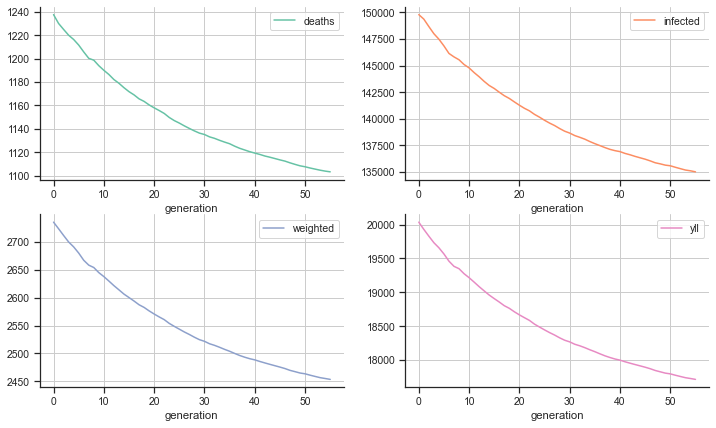

In [144]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(result_means.columns):
    ax = axs[i//2][i%2]
    result_means[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()

## Best individual

In [145]:
filenames = os.listdir(path+"/best_individuals/")
best_individuals = []
for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
    best_individuals.append(utils.read_pickle(path+"/best_individuals/"+individual))

best_individual_scores = {gen: {"individual": None,"deaths":None, "infected":None, "weighted":None, "yll":None} for gen in range(len(best_individuals))}
for i, individual in enumerate(best_individuals):
    best_individual_scores[i]["individual"] = individual
    for obj in ["deaths", "infected", "weighted", "yll"]:
        best_individual_scores[i][obj] = np.mean(final_scores[i][individual.ID][obj])
results = pd.DataFrame(dict(best_individual_scores)).T
results.index.rename("generation", inplace=True)
results

,individual,deaths,infected,weighted,yll
generation,,,,,
0,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
1,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
2,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
3,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
4,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
5,gen_0_003,1031.116869,123955.465024,2270.67152,16195.933333
6,gen_6_012,1000.436982,121358.924863,2214.026231,15729.5
7,gen_6_012,1000.436982,121358.924863,2214.026231,15729.5
8,gen_6_012,1000.436982,121358.924863,2214.026231,15729.5


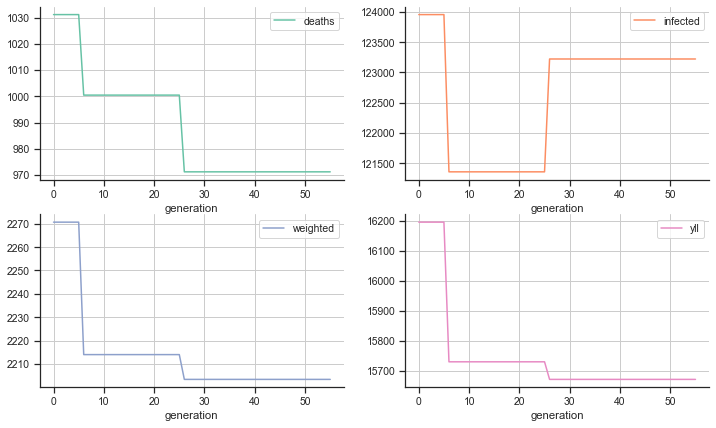

In [146]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(results.columns[1:]):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()